<a href="https://colab.research.google.com/github/joalissonnascimento/maha_energy/blob/main/Exerc%C3%ADcio_Estat%C3%ADstica_Inferencial_DNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import e Conhecendo os dados

In [ ]:
# Importação das bibliotecas
from google.colab import files

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

In [ ]:
# Upload dos dados
df = pd.read_csv('/content/Walmart 2.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
# Preview da qualidade dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB




Você precisa avaliar a performance global das vendas semanais das lojas do Wallmart. Porém, o processo de estração de dados é devagar e custoso, por isso não seria possível recolher todas as vendas semanais do ano para fazer uma estimativa com precisão de 100%. A única saída é realizar uma amostragem dos dados de uma loja e em cima disso calcular o intervalo de confiança das vendas para que os superioes tenham uma noção da média das vendas da loja.

Pratique os conceitos de amostragem vistos na revisão dentro do dataset e ao final, calcule o intervalo de confiança para uma amostra de 25 e outra de 50 das vendas semanais da loja 20. O valor encontrado está dentro da média populacional da loja 20?

#**Etapa 1**



Nessa etapa iremos importar os dados e bibliotecas e verificar as vendas por loja


1.  Importar as bibliotecas e os dados
2.  Analisar os dados
3.  Verifique as vendas semanais por loja
4. Verifique se as vendas em período de feriado tem uma variação maior








#**Etapa 2**#

Nessa etapa iremos verificar os tipos de amostragem



1. Verifique as amostras (Simples, sistemática, estratificada e clusterizada)




#**Etapa 3 (PLUS)**#

Vamos analisar os dados das lojas conforme solicitado acima



1. Verificando as 20 lojas conforme solicitado utilizando distribuição normal

2. Filtrando o dataset e plotando seu histograma

3. Realizando o teste com amostragem aleatória simples com 25 amostras
4. Verificando a média da população
5. Visualizando a distruibuição por dados com ele são

6. Visualizando a distribuição dos dados aplicando o teorema do limite central

7. Realizando o teste com uma amostragem aleatória simples com 50 amostras -> Teorema do Limite Central -> Teste Normal

8. Verificando a média da população



# Etapa 01



## População

In [ ]:
# Todos os dados possíveis
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


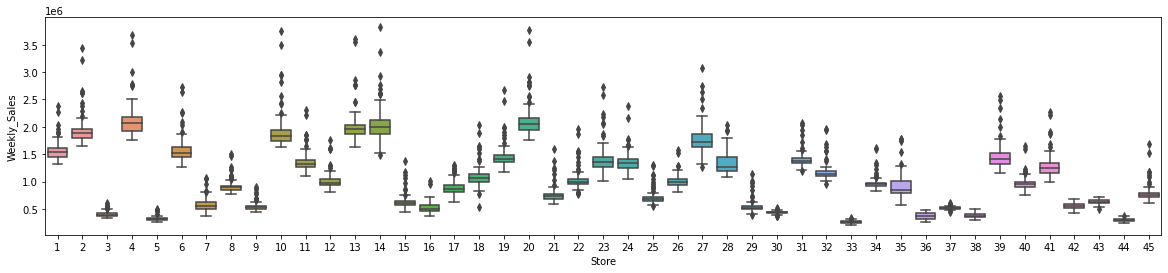

In [ ]:
# Boxplot das vendas semanais por loja
plt.figure(figsize=(20,4))
sns.boxplot(data=df,x='Store',y='Weekly_Sales')

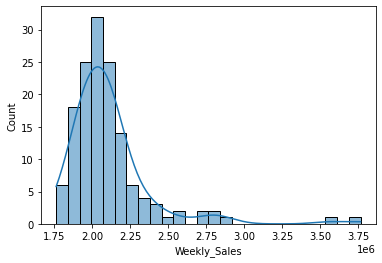

In [ ]:
# Distribuição das vendas semanais da loja 20
sns.histplot(data=df[df.Store == 20],x='Weekly_Sales',kde=True)

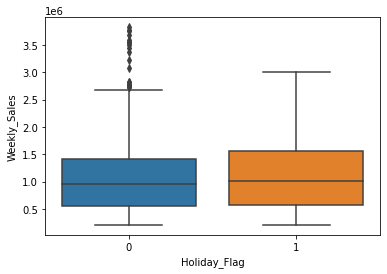

In [ ]:
# Verificando se as vendas em período de feriado tem uma variação maior
sns.boxplot(data=df,y='Weekly_Sales',x='Holiday_Flag')

# Etapa 02

## Amostragem Simples 

In [ ]:
# Amostrando simples usando o random_state
amostra = df.sample(5, random_state=0)
amostra

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
3949,28,14-10-2011,1220984.94,0,67.31,3.805,129.770645,12.890
4555,32,08-06-2012,1246322.44,0,71.14,3.741,197.655186,8.090
2235,16,28-10-2011,505918.21,0,41.97,3.550,195.331898,6.232
5204,37,04-03-2011,527572.25,0,64.55,3.288,212.576205,8.395
3524,25,11-11-2011,719235.07,0,44.81,3.530,210.981020,7.082


In [ ]:
# Amostrando simples usando o seed
np.random.seed(0)
amostra = df.sample(5)
amostra

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
3949,28,14-10-2011,1220984.94,0,67.31,3.805,129.770645,12.890
4555,32,08-06-2012,1246322.44,0,71.14,3.741,197.655186,8.090
2235,16,28-10-2011,505918.21,0,41.97,3.550,195.331898,6.232
5204,37,04-03-2011,527572.25,0,64.55,3.288,212.576205,8.395
3524,25,11-11-2011,719235.07,0,44.81,3.530,210.981020,7.082


In [ ]:
# Quantidade de classes distintas na amostra
df.Store.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [ ]:
df.sample(45,random_state=0).Store.unique()

array([28, 32, 16, 37, 25, 22, 31,  8, 15, 38, 44, 24, 10,  2, 36, 35, 12,
       42, 45, 23, 30, 27, 11, 20, 17,  7, 19, 26, 14, 43])

## Amostragem Sistemática 

In [ ]:
# Amostragem sistemática com passo e primeiro valor definidos
inicial = 15 - 1
passo = 25
final = df.shape[0]
indices = np.arange(inicial, final, passo)
amostra = df.iloc[indices]
amostra


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
14,1,14-05-2010,1494251.50,0,74.78,2.854,210.337426,7.808
39,1,05-11-2010,1551659.28,0,58.74,2.689,211.956394,7.838
64,1,29-04-2011,1455090.69,0,72.03,3.810,215.627954,7.682
89,1,21-10-2011,1502562.78,0,63.71,3.353,217.515976,7.866
114,1,13-04-2012,1621031.70,0,69.07,3.891,221.510210,7.143
...,...,...,...,...,...,...,...,...
6314,45,09-07-2010,787062.00,0,82.45,2.793,182.256960,8.743
6339,45,31-12-2010,679156.20,1,29.67,3.179,182.571448,8.724
6364,45,24-06-2011,762861.78,0,74.85,3.804,185.791961,8.521
6389,45,16-12-2011,1078905.68,0,39.93,3.413,188.797935,8.523


## Amostragem Estratificada 

In [ ]:
# Verificando quantos tipos diferentes de classe temos na amostra
df.Store.value_counts()

1     143
24    143
26    143
27    143
28    143
29    143
30    143
31    143
32    143
33    143
34    143
35    143
36    143
37    143
38    143
39    143
40    143
41    143
42    143
43    143
44    143
25    143
23    143
2     143
22    143
3     143
4     143
5     143
6     143
7     143
8     143
9     143
10    143
11    143
12    143
13    143
14    143
15    143
16    143
17    143
18    143
19    143
20    143
21    143
45    143
Name: Store, dtype: int64

In [ ]:
df.sample(45, random_state = 0).Store.value_counts()

16    4
35    3
44    3
37    2
42    2
22    2
31    2
8     2
23    2
10    2
17    2
20    1
27    1
11    1
19    1
7     1
26    1
14    1
30    1
28    1
45    1
12    1
32    1
36    1
2     1
24    1
38    1
15    1
25    1
43    1
Name: Store, dtype: int64

In [ ]:
df.shape[0]

6435

In [ ]:
from sklearn.model_selection import train_test_split

# Amostragem estratificada usando train_test_split

X1, X2 = train_test_split(df, test_size= 0.1, # tamanho da amostra X2
                          stratify = df['Store']
                          )



In [ ]:
X2['Store'].shape[0]

644

## Amostragem Clusterizada 

In [ ]:
# Amostragem clusterizada selecionando apenas algumas semanas da loja 20
amostra = df[df.Store == 20].sample(20)
amostra

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
2780,20,22-04-2011,2313861.81,0,52.56,3.892,208.477940,7.287
2728,20,23-04-2010,1878862.42,0,50.65,2.902,203.690559,7.856
2784,20,20-05-2011,1953416.06,0,59.01,4.062,208.758317,7.287
2787,20,10-06-2011,2135062.04,0,73.64,3.881,208.153509,7.287
2718,20,12-02-2010,2109107.90,1,22.12,2.773,204.385747,8.187
2750,20,24-09-2010,1789687.65,0,69.37,2.713,204.818213,7.527
2751,20,01-10-2010,1933719.21,0,61.08,2.707,204.885097,7.484
2801,20,16-09-2011,1979009.46,0,64.02,3.742,209.189389,7.274
2746,20,27-08-2010,1946369.57,0,70.51,2.755,204.790031,7.527
2742,20,30-07-2010,1955896.59,0,76.03,2.781,204.605272,7.527


# Etapa 03 (PLUS)

## Distribuição Normal


<img alt="Correlação" width="85%" src="https://proeducacional.com/packages/uploads/2020/08/img_5f2ae87aaa0c2.png">


A partir deste momento, vamos analisar somente os dados da loja 20 conforme foi pedido lá em cima. Usando todos os dados da loja 20, veja se as vendas seguem uma distribuição normal.

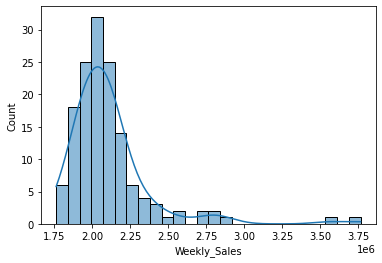

In [ ]:
# Filtrando o dataset e vendo seu histograma
store20 = df[df.Store == 20]
sns.histplot(data=store20, x='Weekly_Sales',kde=True)

In [ ]:
k2, p = stats.normaltest(store20.Weekly_Sales)
alpha = 0.001
p
# H0: Os dados seguem uma distribuição normal -> Rejeitamos a hipótese


1.8609542254814245e-27

<img alt="Correlação" width="85%" src="https://www.dummies.com/wp-content/uploads/451825.image0.jpg">





<img alt="Correlação" width="85%" src="https://www.dummies.com/wp-content/uploads/451825.image0.jpg">





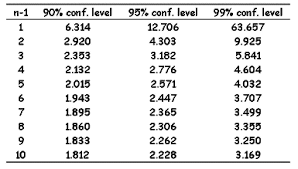

![](https://www.statisticshowto.com/wp-content/uploads/2021/12/confidence-limits.bmp)

In [ ]:
# Realizando o teste com uma amostragem aleatória simples com 25 amostras -> Teste T
amostra = store20.sample(25, random_state = 0)
confidence = 0.95
dof = amostra.shape[0]-1

interval_t = stats.t.interval(alpha=confidence,
                              df=dof,
                              loc=amostra.Weekly_Sales.mean(),
                              scale=stats.sem(amostra.Weekly_Sales)
                              )

interval_t


(2028917.2499684282, 2255093.4844315723)

In [ ]:
# Verificando a média da população
store20.Weekly_Sales.mean()

2107676.8703496507

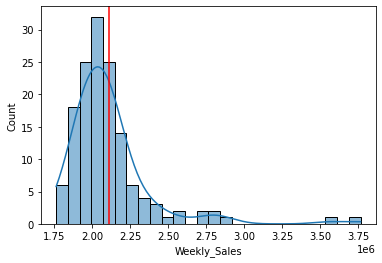

In [ ]:
# Visualizando a distribuição dos dados como ele são
sns.histplot(data=store20,x='Weekly_Sales',kde=True)
plt.axvline(store20['Weekly_Sales'].mean(), 0, 1,c='Red')

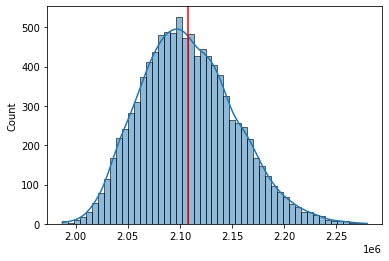

In [ ]:
# Visualizando a distribuição dos dados aplicando o teorema do limite central
val_list = []
for i in range(10000):
  val_list.append(store20.sample(30)['Weekly_Sales'].mean())

sns.histplot(np.array(val_list),kde=True)
plt.axvline(np.array(val_list).mean(), 0, 1,c='Red')

In [ ]:
# Realizando o teste com uma amostragem aleatória simples com 50 amostras -> Teorema do Limite Central -> Teste Normal

amostra = store20.sample(50, random_state = 0)
confidence = 0.95

interval_n = stats.norm.interval(alpha=confidence,
                                 loc=amostra.Weekly_Sales.mean(),
                                 scale=stats.sem(amostra.Weekly_Sales)
                                )

interval_n

(2071485.9996257257, 2210783.6619742736)

In [ ]:
# Verificando a média da população
store20.Weekly_Sales.mean()

2107676.8703496507

In [ ]:
interval_t

(2028917.2499684282, 2255093.4844315723)